In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
from sklearn.linear_model import LogisticRegression
drive.mount('/content/drive')
sns.set_theme(style="darkgrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
#Readung the data set from the drive
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan-Prediction/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan-Prediction/test_Y3wMUE5_7gLdaTN.csv')

#loading the results.csv file
results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan-Prediction/results.csv')

#remove the hastags from the lines commented below to run the code locally

#train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
#test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
#results = pd.read_csv('results.csv')

In [3]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.describe()

## Data Cleaning

<Axes: >

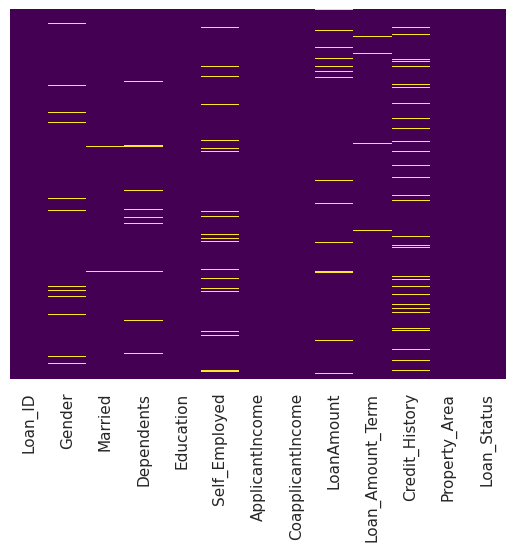

In [5]:
sns.heatmap(train.isnull(), cmap='viridis', annot=False, cbar = False, yticklabels = False)

In [6]:
def replace_D(data):
    if data == '3+':
        return 3
    else:
        return data

def clean(df :pd.core.frame.DataFrame):
    df.drop('Loan_ID', axis=1, inplace=True)
    df = df.dropna()
    df['Male'] = pd.get_dummies(df['Gender'], drop_first=True)
    df['Graduate'] = pd.get_dummies(df['Education'])['Graduate']

    married = pd.get_dummies(df['Married'], drop_first=True)
    self_employed = pd.get_dummies(df['Self_Employed'])['Yes']
    property_area = pd.get_dummies(df['Property_Area'], drop_first=True)

    df = df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis=1)
    df['Married'] = married
    df['Self_Employed'] = self_employed
    df = pd.concat([df, property_area], axis=1)

    df['Dependents'] = df['Dependents'].apply(replace_D)
    return df

In [7]:
train = clean(train)
train.head()

<ipython-input-6-2b03199d8c32>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male'] = pd.get_dummies(df['Gender'], drop_first=True)
<ipython-input-6-2b03199d8c32>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Graduate'] = pd.get_dummies(df['Education'])['Graduate']


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Graduate,Married,Self_Employed,Semiurban,Urban
1,1,4583,1508.0,128.0,360.0,1.0,N,True,True,True,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,Y,True,True,True,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,Y,True,False,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,Y,True,True,False,False,False,True
5,2,5417,4196.0,267.0,360.0,1.0,Y,True,True,True,True,False,True


## EDA

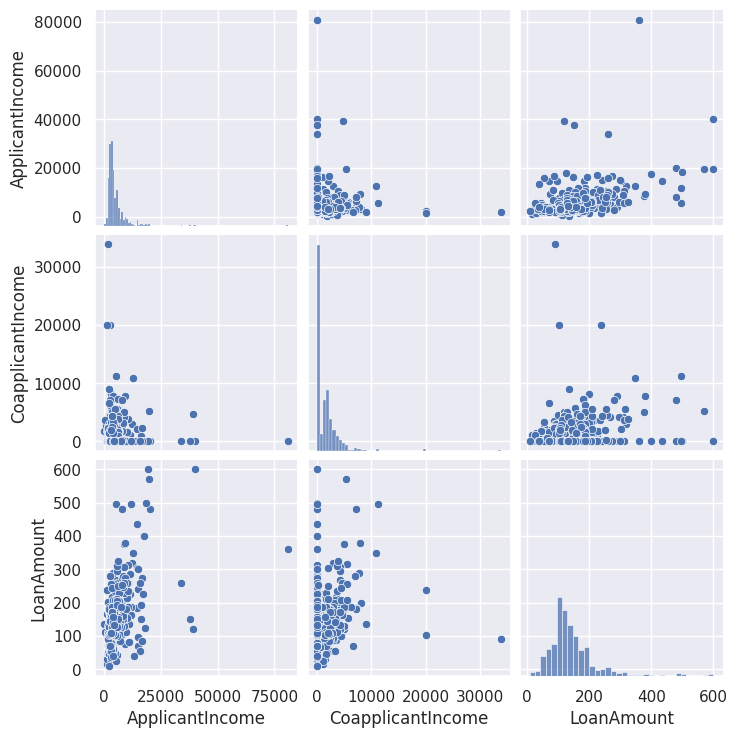

In [8]:
sns.pairplot(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

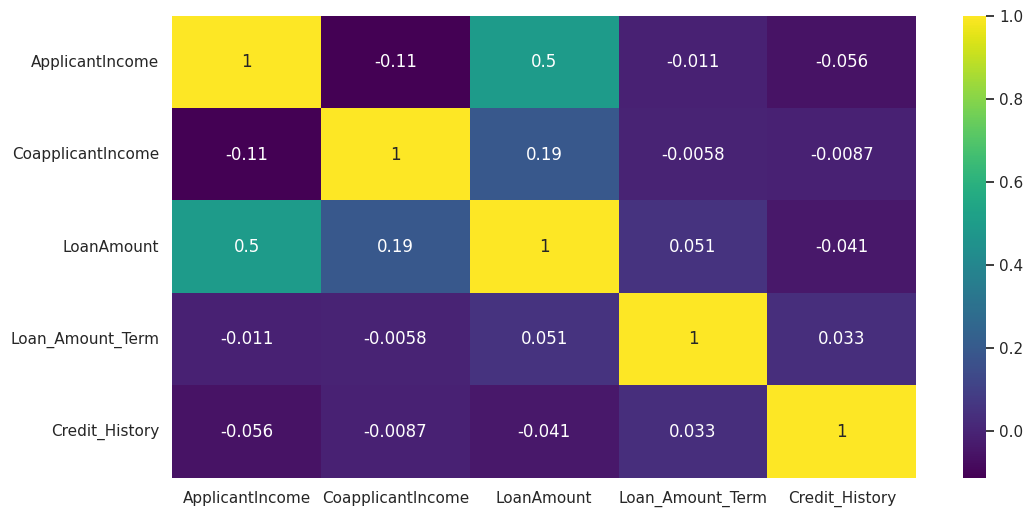

In [9]:
# Filter out non-numeric columns from the dataset
numeric_data = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].dropna()
numeric_data = train.select_dtypes(include=[np.number])

# Now create the heatmap with the numeric data
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.show()

<Axes: xlabel='Dependents', ylabel='count'>

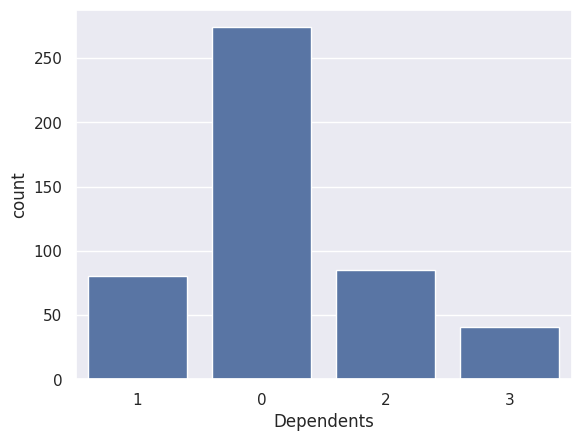

In [10]:
sns.countplot(x = train['Dependents'])

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

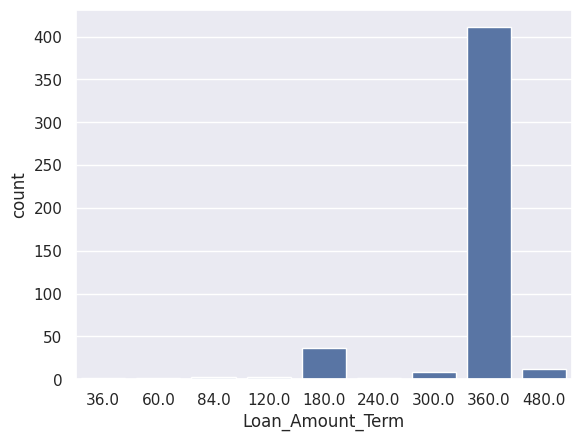

In [11]:
sns.countplot(x = train['Loan_Amount_Term'])

<Axes: xlabel='Self_Employed', ylabel='count'>

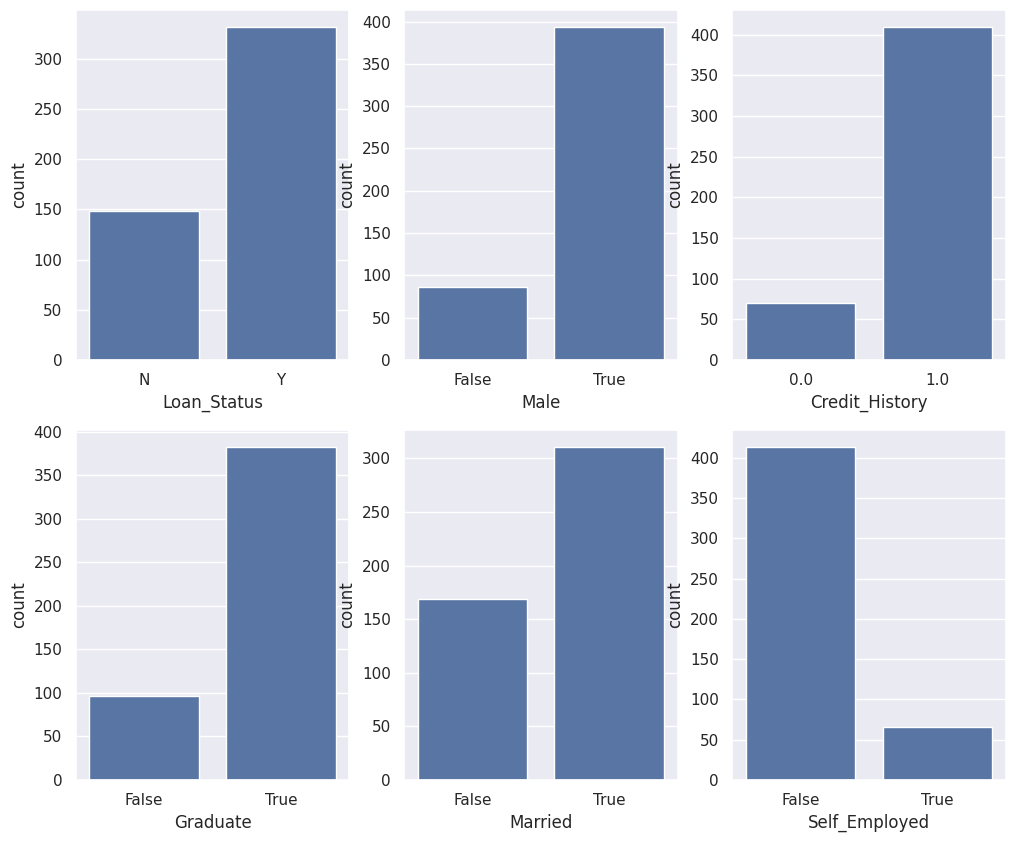

In [12]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.countplot(x = train['Loan_Status'])
plt.subplot(2, 3, 2)
sns.countplot(x = train['Male'])
plt.subplot(2, 3, 3)
sns.countplot(x=train['Credit_History'])
plt.subplot(2, 3, 4)
sns.countplot(x=train['Graduate'])
plt.subplot(2, 3, 5)
sns.countplot(x=train['Married'])
plt.subplot(2, 3, 6)
sns.countplot(x=train['Self_Employed'])

## Preprocessing and Model testing

In [13]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_val = scaler.transform(X_val)
reg_classifier = LogisticRegression()
reg_classifier.fit(X_train, y_train)
reg_pred = reg_classifier.predict(X_val)

print(classification_report(y_val, reg_pred))
print( "The confusion Matrix below: ",confusion_matrix(y_val, reg_pred))

              precision    recall  f1-score   support

           N       0.95      0.40      0.56        48
           Y       0.79      0.99      0.88       111

    accuracy                           0.81       159
   macro avg       0.87      0.69      0.72       159
weighted avg       0.84      0.81      0.78       159

The confusion Matrix below:  [[ 19  29]
 [  1 110]]


In [15]:
svc_classifier = SVC(kernel='rbf', random_state=1)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_val)
print(classification_report(y_val, svc_pred))
print(confusion_matrix(y_val, svc_pred))

              precision    recall  f1-score   support

           N       0.95      0.40      0.56        48
           Y       0.79      0.99      0.88       111

    accuracy                           0.81       159
   macro avg       0.87      0.69      0.72       159
weighted avg       0.84      0.81      0.78       159

[[ 19  29]
 [  1 110]]


## Prediction

In [16]:
testID = test.dropna()['Loan_ID'].values
test = clean(test)
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         289 non-null    object 
 1   ApplicantIncome    289 non-null    int64  
 2   CoapplicantIncome  289 non-null    int64  
 3   LoanAmount         289 non-null    float64
 4   Loan_Amount_Term   289 non-null    float64
 5   Credit_History     289 non-null    float64
 6   Male               289 non-null    bool   
 7   Graduate           289 non-null    bool   
 8   Married            289 non-null    bool   
 9   Self_Employed      289 non-null    bool   
 10  Semiurban          289 non-null    bool   
 11  Urban              289 non-null    bool   
dtypes: bool(6), float64(3), int64(2), object(1)
memory usage: 17.5+ KB


<ipython-input-6-2b03199d8c32>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male'] = pd.get_dummies(df['Gender'], drop_first=True)
<ipython-input-6-2b03199d8c32>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Graduate'] = pd.get_dummies(df['Education'])['Graduate']


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Graduate,Married,Self_Employed,Semiurban,Urban
0,0,5720,0,110.0,360.0,1.0,True,True,True,False,False,True
1,1,3076,1500,126.0,360.0,1.0,True,True,True,False,False,True
2,2,5000,1800,208.0,360.0,1.0,True,True,True,False,False,True
4,0,3276,0,78.0,360.0,1.0,True,False,False,False,False,True
5,0,2165,3422,152.0,360.0,1.0,True,False,True,True,False,True


<Axes: xlabel='count'>

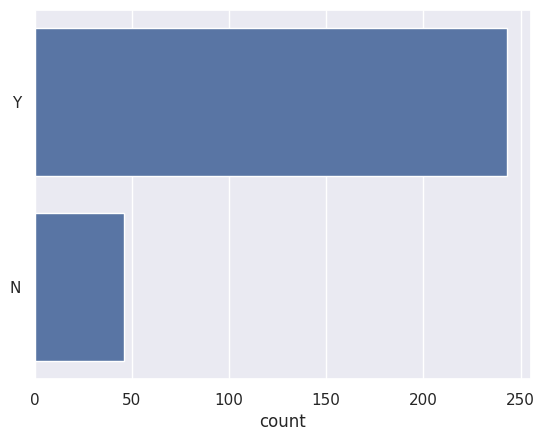

In [17]:
test = scaler.transform(test)
prediction = svc_classifier.predict(test)
sns.countplot(prediction)

In [18]:
testID = pd.DataFrame(testID)
pred_df = pd.DataFrame(prediction, columns=['Loan Status'])
result = pd.concat([testID, pred_df], axis=1)
result.to_csv('results.csv', index=False)

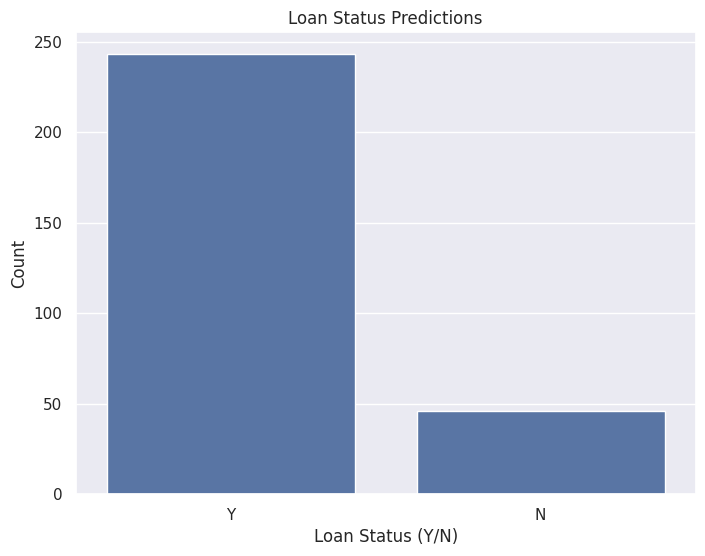

In [19]:
#Visualizing the results Using charts
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Status', data=results)
plt.title('Loan Status Predictions')
plt.xlabel('Loan Status (Y/N)')
plt.ylabel('Count')
plt.show()